In [1]:
import pandas as pd
import numpy as np

from sklearn import ensemble

#Load our two Data Frames
AmesDummies = pd.read_csv('AmesDummies.csv')
AmesDummiesOrdinal = pd.read_csv('AmesDummiesOrdinal.csv')

In [2]:
#Load the Forward Selection DF, which contains the list of Features to include in the linear model:
AmesFeatureDF = pd.read_csv('AmesDummiesForwardAICList.csv')

In [3]:
#Trim AmesDummiesOrdinal to a DF containing only the selected Features:
AmesDF = pd.concat([AmesDummiesOrdinal[list(AmesFeatureDF['CreatedFeatures'])],AmesDummiesOrdinal[['SalePrice']]], axis=1)

In [4]:
#Transform AmesDF into the Train AmesDF
np.random.seed(19)
testIdxes = np.random.choice(range(1458), size=292, replace=False)
trainIdxes = list(set(range(1458))-set(testIdxes))

AmesDF2 = AmesDF.copy()
AmesDF = AmesDF.iloc[trainIdxes,]
AmesDFTest = AmesDF2.iloc[testIdxes,]

In [5]:
#Reset indices of AmesDF
AmesDF.index = range(1166)

In [6]:
#Initiate K-fold (n=5) cross-validation model to train/test:

import sklearn.model_selection as ms
ms_k5 = ms.KFold(n_splits=5, shuffle=True)

In [7]:
from sklearn.model_selection import RandomizedSearchCV

#We will perform a grid search to find the optimal hyperparameters for our RF algorithm and test using our K-fold data:

# Number of trees in random forest
n_estimators = [50, 100, 200, 400, 600, 800, 1000, 1200]
# Type of loss
loss = ['ls', 'lad', 'huber']
# Maximum number of levels in tree
max_depth = [2, 3, 5, 10, 15]
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Method of selecting samples for training each tree
max_features = ['auto', 'sqrt', 'log2', None]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'loss': loss}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
gradientBoost = ensemble.GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gradientBoost_random = RandomizedSearchCV(estimator = gradientBoost, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
# Fit the random search model
gradientBoost_random.fit(AmesDF.drop('SalePrice', axis=1), AmesDF['SalePrice'])

#Then print the best parameters using best_params_
gradientBoost_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, loss=ls 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, loss=ls, total=   3.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, loss=ls 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, loss=ls, total=   3.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, loss=ls 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, loss=ls, total=   3.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, loss=ls 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, loss=ls, total=   3.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, loss=ls 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, loss=ls, total=   3.2s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=15, loss=huber 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features=None, max_dep

[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=log2, max_depth=2, loss=lad, total=   0.5s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=log2, max_depth=2, loss=lad 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=log2, max_depth=2, loss=lad, total=   0.5s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=log2, max_depth=2, loss=lad 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=2, max_features=log2, max_depth=2, loss=lad, total=   0.5s
[CV] n_estimators=400, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3, loss=ls 
[CV]  n_estimators=400, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3, loss=ls, total=   0.7s
[CV] n_estimators=400, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3, loss=ls 
[CV]  n_estimators=400, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=3

[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5, loss=lad, total=   0.2s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5, loss=lad 
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5, loss=lad, total=   0.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=5, loss=huber 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=5, loss=huber, total=   2.8s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=5, loss=huber 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=5, loss=huber, total=   2.7s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=5, loss=huber 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=log2, m

[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=4, max_features=log2, max_depth=2, loss=huber, total=   0.8s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=10, loss=huber 
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=10, loss=huber, total=   0.6s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=10, loss=huber 
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=10, loss=huber, total=   0.6s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=10, loss=huber 
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=10, loss=huber, total=   0.7s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=10, loss=huber 
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, loss=ls, total=   6.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, loss=ls 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, loss=ls, total=   6.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, loss=ls 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, loss=ls, total=   6.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, loss=ls 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, loss=ls, total=   6.1s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, loss=ls 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto,

[CV]  n_estimators=600, min_samples_split=4, min_samples_leaf=6, max_features=sqrt, max_depth=3, loss=ls, total=   0.2s
[CV] n_estimators=600, min_samples_split=4, min_samples_leaf=6, max_features=sqrt, max_depth=3, loss=ls 
[CV]  n_estimators=600, min_samples_split=4, min_samples_leaf=6, max_features=sqrt, max_depth=3, loss=ls, total=   0.2s
[CV] n_estimators=600, min_samples_split=4, min_samples_leaf=6, max_features=sqrt, max_depth=3, loss=ls 
[CV]  n_estimators=600, min_samples_split=4, min_samples_leaf=6, max_features=sqrt, max_depth=3, loss=ls, total=   0.2s
[CV] n_estimators=600, min_samples_split=4, min_samples_leaf=6, max_features=sqrt, max_depth=3, loss=ls 
[CV]  n_estimators=600, min_samples_split=4, min_samples_leaf=6, max_features=sqrt, max_depth=3, loss=ls, total=   0.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, loss=ls 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, los

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, loss=ls, total=   1.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, loss=ls 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, loss=ls, total=   1.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, loss=ls 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, loss=ls, total=   1.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=3, loss=ls 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=3, loss=ls, total=   0.0s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=3, loss=ls 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=3

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=10, loss=lad, total=   6.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=10, loss=lad 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=10, loss=lad, total=   6.1s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, loss=lad 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, loss=lad, total=   0.8s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, loss=lad 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, loss=lad, total=   0.9s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, loss=lad 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=aut

[CV]  n_estimators=400, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=2, loss=huber, total=   0.3s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=15, loss=lad 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=15, loss=lad, total=  12.2s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=15, loss=lad 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=15, loss=lad, total=  12.4s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=15, loss=lad 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=15, loss=lad, total=  12.2s
[CV] n_estimators=800, min_samples_split=6, min_samples_leaf=8, max_features=auto, max_depth=15, loss=lad 
[CV]  n_estimators=800, min_samples_split=6, min_samples_leaf=8, max_features=auto,

[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15, loss=ls, total=   0.6s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15, loss=ls 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15, loss=ls, total=   0.6s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15, loss=ls 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15, loss=ls, total=   0.6s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15, loss=ls 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15, loss=ls, total=   0.6s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=15, loss=ls 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=None, max_dept

[CV]  n_estimators=50, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, loss=huber, total=   0.1s
[CV] n_estimators=50, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, loss=huber 
[CV]  n_estimators=50, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, loss=huber, total=   0.1s
[CV] n_estimators=50, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, loss=huber 
[CV]  n_estimators=50, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, loss=huber, total=   0.1s
[CV] n_estimators=50, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, loss=huber 
[CV]  n_estimators=50, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, loss=huber, total=   0.1s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, loss=lad 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max

[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=None, max_depth=15, loss=lad, total=   0.6s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=None, max_depth=15, loss=lad 
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=None, max_depth=15, loss=lad, total=   0.6s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=None, max_depth=15, loss=lad 
[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=8, max_features=None, max_depth=15, loss=lad, total=   0.6s
[CV] n_estimators=800, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=15, loss=huber 
[CV]  n_estimators=800, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=15, loss=huber, total=  11.6s
[CV] n_estimators=800, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=15, loss=huber 
[CV]  n_estimators=800, min_samples_split=4, min_samples_leaf=1, max_features=sqrt,

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, loss=ls, total=   6.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, loss=ls 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, loss=ls, total=   4.8s
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=6, max_features=sqrt, max_depth=5, loss=lad 
[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=6, max_features=sqrt, max_depth=5, loss=lad, total=   0.7s
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=6, max_features=sqrt, max_depth=5, loss=lad 
[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=6, max_features=sqrt, max_depth=5, loss=lad, total=   0.7s
[CV] n_estimators=400, min_samples_split=6, min_samples_leaf=6, max_features=sqrt, max_depth=5, loss=lad 
[CV]  n_estimators=400, min_samples_split=6, min_samples_leaf=6, max_features=sqrt, max_d

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=8, max_features=sqrt, max_depth=15, loss=huber, total=   8.5s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=10, loss=ls 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=10, loss=ls, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=10, loss=ls 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=10, loss=ls, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=10, loss=ls 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=10, loss=ls, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_depth=10, loss=ls 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=log2, max_

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 23.9min finished


{'n_estimators': 800,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 2,
 'loss': 'huber'}

In [8]:
#The grid search optimization revealed optimal parameters. Let's set these to the gradientBoost function:
gradientBoost2 = ensemble.GradientBoostingRegressor()
gradientBoost2.set_params(n_estimators=800, min_samples_split=6, min_samples_leaf=4, max_features='log2', max_depth=2, loss='huber')

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [10]:
#Perform separate train/test validation runs for each of the 5 K-fold groups:

#Create X and Y variables
X = AmesDF.drop('SalePrice', axis=1)
Y = AmesDF['SalePrice']

#Rename the true (20% untouched) test DFs
testX = AmesDFTest.drop('SalePrice', axis=1)
testY = AmesDFTest['SalePrice']

#Instantiate the K-fold generator object:
np.random.seed(0)
AmesDF5Fold = ms_k5.split(AmesDF.drop('SalePrice', axis=1), AmesDF['SalePrice'])

#Produce list of test R^2 scores, and Actual vs Predicted lists for the individual runs
R2List = []
PredictList = []
ActualList = []
PureTestR2 = []
RMSLE = []

for train, test in AmesDF5Fold:
    #Run the fit using the train data for each K
    gradientBoost2.fit(X.iloc[train,], Y[train])
    #Run your predicion for the "missing" K-part
    p = gradientBoost2.predict(X.iloc[test,])
    #Check your schore for the missing K-part
    R2 = gradientBoost2.score(X.iloc[test,], Y[test])
    #Run a test on the completely untouched test 20%
    TestR2 = gradientBoost2.score(testX, testY)
    
    #Append these scores to the lists above
    R2List.append(R2)
    PureTestR2.append(TestR2)
    PredictList.append(p)
    ActualList.append(Y[test])
    
    #Make predictions for the completely untouched 20%
    PredictionsTest = gradientBoost2.predict(testX)
    
    #Use these predictions to calculate RMSLE for the untouched 20% and append
    RMSLEvalue = np.sqrt(np.mean(np.power(np.log1p(testY)-np.log1p(PredictionsTest), 2)))
    RMSLE.append(RMSLEvalue)

In [11]:
#What are the R^2 values for our runs?
print(R2List)
print(PureTestR2)
print(RMSLE)

[0.8997065367349717, 0.9311078536626485, 0.9401849004988196, 0.902999958141414, 0.8991980675838602]
[0.9087690733620173, 0.9189055778687838, 0.9207144671024653, 0.9179535497838378, 0.9079901749378115]
[0.12937351062862035, 0.1258951265292951, 0.12059884979191039, 0.12075765379572281, 0.13073632694423243]


In [12]:
'''Of the three tests performed thus far (Linear, Random Forest, and now Gradient Boost), the gradient boost results are 
clearly the best, with a RMSLE of approximately 0.125 (0.145 for Linear, 0.135 for RF).'''

'Of the three tests performed thus far (Linear, Random Forest, and now Gradient Boost), the gradient boost results are \nclearly the best, with a RMSLE of approximately 0.125 (0.145 for Linear, 0.135 for RF).'

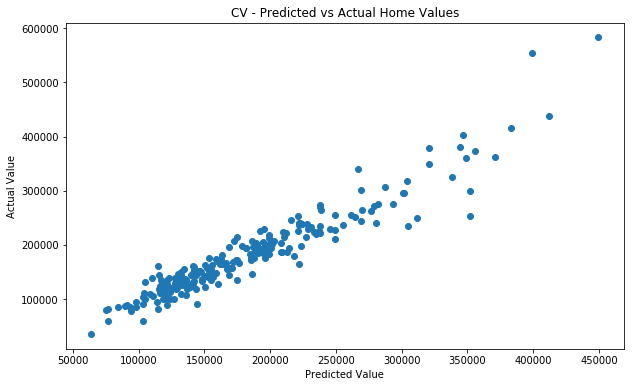

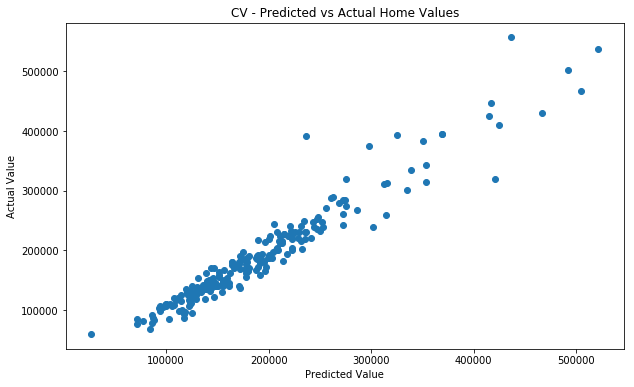

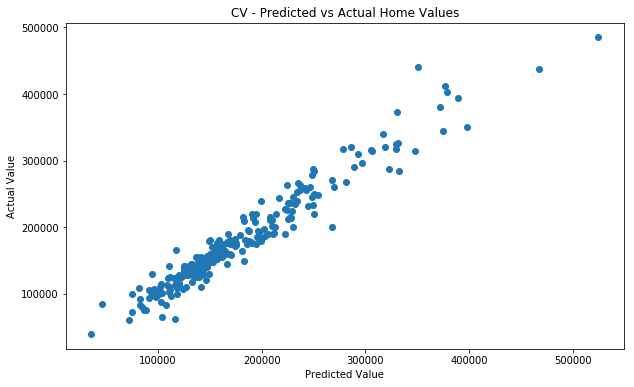

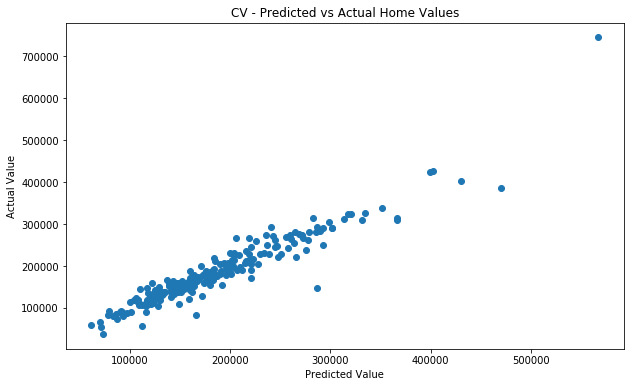

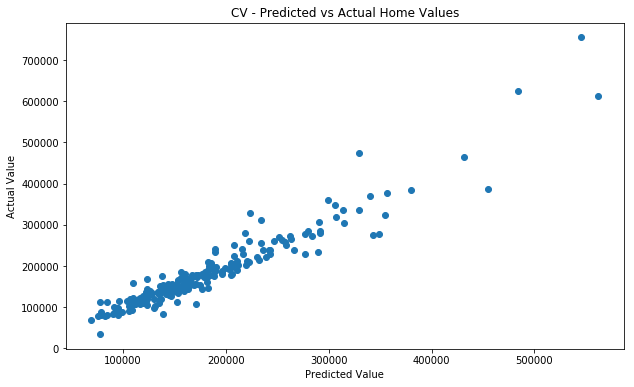

In [14]:
#Plot the predicted vs actual 'SalePrice' values for each of the 5 runs:
import matplotlib.pyplot as plt

for i in range(len(PredictList)):

    plt.figure(figsize=(10,6))
    plt.scatter(PredictList[i], ActualList[i])
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.title('CV - Predicted vs Actual Home Values')   
    plt.show()